In [200]:
import pandas as pd 
import config
import plotly.express as px
import plotly.offline as pyo
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from sklearn.feature_selection import SelectFromModel
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor
pd.set_option('display.max_rows', 500)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
px.set_mapbox_access_token("pk.eyJ1IjoidG9ueXBhcmswMDEiLCJhIjoiY2t2dWVramFmODZqaDJucXBrbnhpZ2JreCJ9.-XXf1YI8YESgWbWODhZAZA")


In [159]:
df = pd.read_csv("/Users/tonypark/Desktop/machine-learning-housing-project/communal/Ames_Housing_Price_Data_cleaned_3.csv")
pd.set_option('display.max_columns', None)
px.set_mapbox_access_token("pk.eyJ1IjoidG9ueXBhcmswMDEiLCJhIjoiY2t2dWVramFmODZqaDJucXBrbnhpZ2JreCJ9.-XXf1YI8YESgWbWODhZAZA")

In [160]:
df.drop("lot_bucket", axis=1, inplace = True)
df.drop("Prop_Addr", axis=1, inplace = True)
df.drop("mean_LotFrontage", axis=1, inplace = True)

In [161]:
df["GarageYrBlt"][df["GarageYrBlt"] == 'None'] = np.nan
df["GarageYrBlt"] = df["GarageYrBlt"].astype("float")

#if garage year build is na, replace with when house was built
#df["GarageYrBlt"]=df["GarageYrBlt"].fillna(df["YearBuilt"])
df.drop("GarageYrBlt", inplace=True, axis=1)

/Users/tonypark/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Lasso without Feature Engineering

In [224]:
df["log_SalePrice"] = np.log(df["SalePrice"])

X = df.drop(["SalePrice","PID", "log_SalePrice"], axis=1)
y = df["log_SalePrice"]

In [357]:
#dummify X
X = pd.get_dummies(X, drop_first=True)

In [358]:
#min max scale the variables 
xscaler = MinMaxScaler()
x_train = xscaler.fit_transform(x_train)
x_test = xscaler.transform(x_test)

In [359]:
#test train split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [263]:
clf = linear_model.Lasso()

parameters = {'alpha':np.linspace(0.00001, 1000, 100), 
             }
gs = GridSearchCV(
    linear_model.Lasso(max_iter=1000), 
    parameters, 
    verbose= 3, 
    cv = 5,
    scoring='r2'
)


In [275]:
testr2 = []
trainr2 = []
clf = linear_model.Lasso(max_iter=2000)
for alpha in np.linspace(0.00001, 1000, 100):
    clf.set_params(alpha= alpha)
    clf.fit(x_train, y_train)
    trainr2.append(clf.score(x_train, y_train))
    testr2.append(clf.score(x_test, y_test))


/Users/tonypark/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:646: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.390e+00, tolerance: 2.769e-02



In [ ]:
list(zip(list(gs.best_estimator_.coef_), list(X.columns)))

In [565]:
##MSE 
mean_squared_error(gs.predict(xscaler.transform(x_test)), y_test)

/Users/tonypark/anaconda3/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning:

X does not have valid feature names, but MinMaxScaler was fitted with feature names



9232246759.990479

In [279]:
##get feature importance 
co  = list(zip(list(gs.best_estimator_.coef_), list(X.columns)))

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

## Feature Cleaning & Engineering

In [6]:
#drop PID 
df.drop("PID", axis=1, inplace=True)

In [7]:
#remove outliers 
df.drop([115, 132, 141, 335, 490, 538, 2047, 2239], inplace=True) 

In [365]:
# #categorize neighborhoods 
# df =df.replace("Landmrk", "OldTown")
# df =df.replace("GrnHill", "OldTown")
# df =df.replace("NoRidge", "Somerst")
# df =df.replace("StoneBr", "Somerst")
# df =df.replace("NWAmes", "Gilbert")
# df =df.replace("Veenker", "Somerst")
# df =df.replace("NridgHt", "Somerst")
# df =df.replace("Blmngtn", "Gilbert")
# df =df.replace("Sawyer", "OldTown")
# df =df.replace("Edwards", "OldTown")
# df =df.replace("BrkSide", "OldTown")
# df =df.replace("SWISU", "OldTown")
# df =df.replace("CollgCr", "SawyerW")
# df =df.replace("Crawfor", "Timber")
# df =df.replace("Blueste", "OldTown")
# df =df.replace("ClearCr", "SawyerW")
# df =df.replace("IDOTRR", "OldTown")
# df =df.replace("BrDale", "NAmes")
# df =df.replace("NPkVill", "NAmes")
# df =df.replace("Greens", "Somerst")
# df =df.replace("MeadowV", "OldTown")

In [230]:
# #convert MoSold to object to be dummified 
# df["MoSold"]=df["MoSold"].astype("str")
# df.drop("YrSold", inplace=True, axis=1)

In [8]:
#identify categorical vs numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_columns = list(df.select_dtypes(include=numerics).columns)
categorical_columns =list(df.drop(numeric_columns, axis=1).columns)


In [9]:
#number of bathrooms
df["Num_of_Bath"] = df["BsmtFullBath"] + 0.5* df["BsmtHalfBath"] + df["FullBath"] + 0.5*df["HalfBath"]
df.drop(["FullBath", 'BsmtFullBath',"BsmtHalfBath","HalfBath"], axis=1, inplace=True)


In [10]:
#drop lat and long 
df.drop(["lat","long"], axis=1, inplace=True)

#has a second floor

#has a pool 

#has a garage

#has a basement 

#has a fireplace


#take the log of grLivARea
df["log_GrLivArea"] = np.log(df["GrLivArea"])
df.drop("GrLivArea", axis=1, inplace=True)

#total_living_SF
# df["square_footage_1"] = df["GrLivArea"] + df["TotalBsmtSF"] + df["GarageArea"]

#OverallQual * OverallCond 
df["total_cond"] = df["OverallQual"] * df["OverallCond"]
df.drop(["OverallQual","OverallCond"], axis=1, inplace=True)


#dropping all square footage that add up to grlivearea
# df.drop(["1stFlrSF", "2ndFlrSF", "BsmtFinSF1","BsmtFinSF2", "BsmtUnfSF"], inplace=True, axis=1)
# df.drop(["BsmtFinSF1","BsmtFinSF2", "BsmtUnfSF"], inplace=True, axis=1)


In [234]:
##ordinal categorie
# dict_1 = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2,'Po':1, 'None':0}
# dict_2 = {'Gd':4, 'Av':3, 'Mn':2, 'No':1,'None':0}
# dict_3 = {'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'None':0}
# df["ExterQual"] = df["ExterQual"].apply(lambda x: dict_1[x])
# df["ExterCond"] = df["ExterCond"].apply(lambda x: dict_1[x])
# df["BsmtQual"] = df["BsmtQual"].apply(lambda x: dict_1[x])
# df["BsmtCond"] = df["BsmtCond"].apply(lambda x: dict_1[x])
# df["BsmtExposure"] = df["BsmtExposure"].apply(lambda x: dict_2[x])
# df["BsmtFinType1"] = df["BsmtFinType1"].apply(lambda x: dict_3[x])
# df["HeatingQC"] = df["HeatingQC"].apply(lambda x: dict_1[x])
# df["KitchenQual"] = df["KitchenQual"].apply(lambda x: dict_1[x])
# df["FireplaceQu"] = df["FireplaceQu"].apply(lambda x: dict_1[x])
# df["GarageQual"] = df["GarageQual"].apply(lambda x: dict_1[x])
# df["GarageCond"] = df["GarageCond"].apply(lambda x: dict_1[x])



## Lasso With Features Reduced and Engineered 

In [36]:
df["log_SalePrice"] = np.log(df["SalePrice"])

In [18]:
y = df["log_SalePrice"]

In [19]:
X = df.drop(["SalePrice","log_SalePrice"], axis=1)

In [20]:
X = pd.get_dummies(X, drop_first=True)

In [15]:
# x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.33)

In [16]:
# xscaler = MinMaxScaler()
# x_train = xscaler.fit_transform(x_train)
# x_test = xscaler.transform(x_test)

In [21]:
lasso = linear_model.Lasso(max_iter = 1000)
trainR2= []
testR2 = []
alphas = np.linspace(1e-5, 1e-3,100)
for i ,alpha in enumerate(alphas):
    
    x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.33)
    xscaler = MinMaxScaler()
    x_train = xscaler.fit_transform(x_train)
    x_test = xscaler.transform(x_test)

    lasso.set_params(alpha = alpha)
    lasso.fit(x_train, y_train)
    

        
    trainR2.append(lasso.score(x_train, y_train))
    testR2.append(lasso.score(x_test, y_test))
    print(i, end = '\r')
        
    
best_alpha = alphas[np.argmax(testR2)]
lasso.set_params(alpha = best_alpha)

best_coefs = pd.Series(lasso.coef_, index = X.columns)

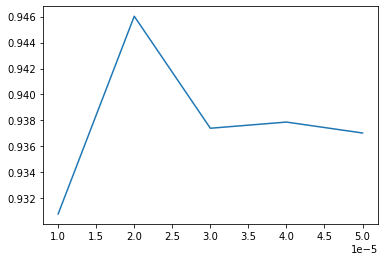

In [22]:
plt.plot(alphas[:5], trainR2[:5])

In [239]:
# lasso = linear_model.Lasso(max_iter = 20000)
# trainR2= []
# testR2 = []
# alphas = np.linspace(1e-5, 1e-3,1000)
# for i ,alpha in enumerate(alphas):
    
# #     x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.33)
# #     xscaler = MinMaxScaler()
# #     x_train = xscaler.fit_transform(x_train)
# #     x_test = xscaler.transform(x_test)
#     x_train_avg = []
#     x_test_avg = []
    
#     for j in range(3):
        
#         x_train, x_test, y_train, y_test = \
#         train_test_split(X.to_numpy(),y.to_numpy(), test_size= 0.33)
        
#         xscaler = MinMaxScaler()
#         x_train = xscaler.fit_transform(x_train)
#         x_test = xscaler.transform(x_test)
    
#         lasso.set_params(alpha = alpha)
#         lasso.fit(x_train, y_train)
        
#         x_train_avg.append(lasso.score(x_train, y_train))
#         x_test_avg.append(lasso.score(x_test, y_test))

        
#     trainR2.append(np.mean(x_train_avg))
#     testR2.append(np.mean(x_test_avg))
#     print(i, end = '\r')
        
    
# best_alpha = alphas[np.argmax(testR2)]
# lasso.set_params(alpha = best_alpha)

# best_coefs = pd.Series(lasso.coef_, index = X.columns)

    
    

In [23]:
y = lasso.set_params(alpha = alpha).fit(x_train, y_train)

In [24]:
sorted(list(zip(y.coef_, X.columns)), key=lambda x: abs(x[0]), reverse=True) 

[(0.9190521424246304, 'log_GrLivArea'),
 (0.7493955312851869, 'total_cond'),
 (0.3912367672386313, 'TotalBsmtSF'),
 (0.24526823330913045, 'YearBuilt'),
 (0.15723448162891074, 'BsmtFinSF1'),
 (0.08776807556640022, 'GarageArea'),
 (0.07869158704797555, 'Neighborhood_Somerst'),
 (0.0786915853771345, 'CentralAir_Y'),
 (0.07787165879580851, 'Num_of_Bath'),
 (0.07352105350809246, 'Exterior1st_BrkFace'),
 (-0.07331715181686356, 'BldgType_Twnhs'),
 (0.06825298839966891, 'GarageCars'),
 (0.06657726737054527, 'Neighborhood_Crawfor'),
 (-0.06307394570207377, 'KitchenQual_TA'),
 (0.06026524542027907, 'Neighborhood_StoneBr'),
 (0.05933837803758788, 'MasVnrArea'),
 (0.05518503233539976, 'BsmtExposure_Gd'),
 (0.054396031087483886, 'Neighborhood_NoRidge'),
 (0.052274242336824074, 'Neighborhood_NridgHt'),
 (0.05130881994558507, 'MSZoning_RL'),
 (0.050338193725819845, 'GarageCond_TA'),
 (-0.04917162019631061, 'ExterCond_Fa'),
 (0.0433837124273803, '2ndFlrSF'),
 (-0.04018089602776583, 'MSSubClass'),
 (-0

In [25]:
max(testR2)

0.9327593657492852

In [26]:
trainR2[np.argmax(testR2)]

0.9277513109900583

In [193]:
def calc_vif(data):
    vif = {}
    for feature in data.columns:
        X = [f for f in data.columns if f != feature]
        X = data[X]
        y = data[feature]
        r2 = linear_model.LinearRegression().fit(X,y).score(X,y)
        vif[feature] = 1/(1-r2)
    return pd.DataFrame.from_dict([vif]).T.sort_values(ascending = False, by = 0)

In [223]:
calc_vif(X[sorted_best_coefs[:20]["index"].values[:15]])

,0
square_footage_1,5.718855
GrLivArea,4.300150
OverallQual,3.085383
YearRemodAdd,1.900518
KitchenQual_TA,1.804537
Neighborhood_OldTown,1.759417
Neighborhood_Somerst,1.695000
HeatingQC_Ex,1.495640
GarageType_Attchd,1.480302
BsmtFinType1_GLQ,1.432999


## Random Forest


In [163]:
df["log_SalePrice"] = np.log(df["SalePrice"])

In [139]:
y = df["log_SalePrice"]

In [140]:
X = df.drop(["SalePrice","log_SalePrice"], axis=1)

In [141]:
X = pd.get_dummies(X, drop_first=True)

In [142]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.33)

In [143]:
x_train

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,MoSold,YrSold,TotalPorchSF,Num_of_Bath,log_GrLivArea,total_cond,MSZoning_FV,MSZoning_I (all),MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_Greens,Neighborhood_GrnHill,Neighborhood_IDOTRR,Neighborhood_Landmrk,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_PreCast,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y
858,180,35.0,3675,2005,2006,82.0,547.0,0.0,0.0,547.0,1072,0,0,2,5,0,2.0,525.0,0,10,2006,44,2.0,6.977281,30,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
1211,80,74.1,10147,1994,1994,32.0,186.0,0.0,206.0,392.0,924,770,0,3,7,1,2.0,398.0,256,3,2007,64,2.5,7.434848,30,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1
859,50,44.0,13758,1990,1991,117.0,902.0,0.0,254.0,1156.0,1187,530,0,3,7,1,2.0,400.0,168,4,2007,36,2.5,7.448334,35,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1
371,20,60.0,7200,1950,1950,0.0,534.0,96.0,246.0,876.0,988,0,0,3,6,0,1.0,276.0,0,5,2007,80,1.0,6.895683,35,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1
1514,20,66.5,20781,1968,2003,0.0,29

In [144]:
### implement random
clf = AdaBoostRegressor(random_state=0)

In [145]:
parameter = {
    "n_estimators":np.linspace(1, 100, 30).astype("int"), 
    "learning_rate":np.linspace(0.5,1, 10)
}



In [146]:
cv = GridSearchCV( clf, param_grid=parameter, cv = 3, verbose=3)

In [147]:
cv.fit(x_train, y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits
[CV 1/3] END ...learning_rate=0.0, n_estimators=1;, score=nan total time=   0.0s
[CV 2/3] END ...learning_rate=0.0, n_estimators=1;, score=nan total time=   0.0s
[CV 3/3] END ...learning_rate=0.0, n_estimators=1;, score=nan total time=   0.0s
[CV 1/3] END ...learning_rate=0.0, n_estimators=4;, score=nan total time=   0.0s
[CV 2/3] END ...learning_rate=0.0, n_estimators=4;, score=nan total time=   0.0s
[CV 3/3] END ...learning_rate=0.0, n_estimators=4;, score=nan total time=   0.0s
[CV 1/3] END ...learning_rate=0.0, n_estimators=7;, score=nan total time=   0.0s
[CV 2/3] END ...learning_rate=0.0, n_estimators=7;, score=nan total time=   0.0s
[CV 3/3] END ...learning_rate=0.0, n_estimators=7;, score=nan total time=   0.0s
[CV 1/3] END ..learning_rate=0.0, n_estimators=11;, score=nan total time=   0.0s
[CV 2/3] END ..learning_rate=0.0, n_estimators=11;, score=nan total time=   0.0s
[CV 3/3] END ..learning_rate=0.0, n_estimators

[CV 1/3] END learning_rate=0.1111111111111111, n_estimators=11;, score=0.734 total time=   0.3s
[CV 2/3] END learning_rate=0.1111111111111111, n_estimators=11;, score=0.791 total time=   0.1s
[CV 3/3] END learning_rate=0.1111111111111111, n_estimators=11;, score=0.716 total time=   0.2s
[CV 1/3] END learning_rate=0.1111111111111111, n_estimators=14;, score=0.739 total time=   0.2s
[CV 2/3] END learning_rate=0.1111111111111111, n_estimators=14;, score=0.805 total time=   0.2s
[CV 3/3] END learning_rate=0.1111111111111111, n_estimators=14;, score=0.716 total time=   0.2s
[CV 1/3] END learning_rate=0.1111111111111111, n_estimators=18;, score=0.743 total time=   0.3s
[CV 2/3] END learning_rate=0.1111111111111111, n_estimators=18;, score=0.805 total time=   0.3s
[CV 3/3] END learning_rate=0.1111111111111111, n_estimators=18;, score=0.734 total time=   0.3s
[CV 1/3] END learning_rate=0.1111111111111111, n_estimators=21;, score=0.749 total time=   0.3s
[CV 2/3] END learning_rate=0.11111111111

[CV 1/3] END learning_rate=0.2222222222222222, n_estimators=7;, score=0.732 total time=   0.1s
[CV 2/3] END learning_rate=0.2222222222222222, n_estimators=7;, score=0.766 total time=   0.1s
[CV 3/3] END learning_rate=0.2222222222222222, n_estimators=7;, score=0.693 total time=   0.1s
[CV 1/3] END learning_rate=0.2222222222222222, n_estimators=11;, score=0.752 total time=   0.2s
[CV 2/3] END learning_rate=0.2222222222222222, n_estimators=11;, score=0.799 total time=   0.2s
[CV 3/3] END learning_rate=0.2222222222222222, n_estimators=11;, score=0.730 total time=   0.2s
[CV 1/3] END learning_rate=0.2222222222222222, n_estimators=14;, score=0.750 total time=   0.2s
[CV 2/3] END learning_rate=0.2222222222222222, n_estimators=14;, score=0.804 total time=   0.2s
[CV 3/3] END learning_rate=0.2222222222222222, n_estimators=14;, score=0.750 total time=   0.2s
[CV 1/3] END learning_rate=0.2222222222222222, n_estimators=18;, score=0.764 total time=   0.6s
[CV 2/3] END learning_rate=0.22222222222222

[CV 1/3] END learning_rate=0.3333333333333333, n_estimators=4;, score=0.711 total time=   0.1s
[CV 2/3] END learning_rate=0.3333333333333333, n_estimators=4;, score=0.759 total time=   0.1s
[CV 3/3] END learning_rate=0.3333333333333333, n_estimators=4;, score=0.689 total time=   0.1s
[CV 1/3] END learning_rate=0.3333333333333333, n_estimators=7;, score=0.756 total time=   0.1s
[CV 2/3] END learning_rate=0.3333333333333333, n_estimators=7;, score=0.806 total time=   0.1s
[CV 3/3] END learning_rate=0.3333333333333333, n_estimators=7;, score=0.735 total time=   0.1s
[CV 1/3] END learning_rate=0.3333333333333333, n_estimators=11;, score=0.765 total time=   0.2s
[CV 2/3] END learning_rate=0.3333333333333333, n_estimators=11;, score=0.806 total time=   0.1s
[CV 3/3] END learning_rate=0.3333333333333333, n_estimators=11;, score=0.737 total time=   0.2s
[CV 1/3] END learning_rate=0.3333333333333333, n_estimators=14;, score=0.774 total time=   0.2s
[CV 2/3] END learning_rate=0.3333333333333333,

[CV 3/3] END learning_rate=0.3333333333333333, n_estimators=100;, score=0.807 total time=   1.6s
[CV 1/3] END learning_rate=0.4444444444444444, n_estimators=1;, score=0.629 total time=   0.0s
[CV 2/3] END learning_rate=0.4444444444444444, n_estimators=1;, score=0.672 total time=   0.0s
[CV 3/3] END learning_rate=0.4444444444444444, n_estimators=1;, score=0.646 total time=   0.1s
[CV 1/3] END learning_rate=0.4444444444444444, n_estimators=4;, score=0.711 total time=   0.1s
[CV 2/3] END learning_rate=0.4444444444444444, n_estimators=4;, score=0.722 total time=   0.1s
[CV 3/3] END learning_rate=0.4444444444444444, n_estimators=4;, score=0.745 total time=   0.1s
[CV 1/3] END learning_rate=0.4444444444444444, n_estimators=7;, score=0.749 total time=   0.1s
[CV 2/3] END learning_rate=0.4444444444444444, n_estimators=7;, score=0.758 total time=   0.1s
[CV 3/3] END learning_rate=0.4444444444444444, n_estimators=7;, score=0.726 total time=   0.1s
[CV 1/3] END learning_rate=0.4444444444444444, n

[CV 2/3] END learning_rate=0.4444444444444444, n_estimators=96;, score=0.835 total time=   1.3s
[CV 3/3] END learning_rate=0.4444444444444444, n_estimators=96;, score=0.815 total time=   2.9s
[CV 1/3] END learning_rate=0.4444444444444444, n_estimators=100;, score=0.803 total time=   1.4s
[CV 2/3] END learning_rate=0.4444444444444444, n_estimators=100;, score=0.833 total time=   1.1s
[CV 3/3] END learning_rate=0.4444444444444444, n_estimators=100;, score=0.814 total time=   1.8s
[CV 1/3] END learning_rate=0.5555555555555556, n_estimators=1;, score=0.629 total time=   0.2s
[CV 2/3] END learning_rate=0.5555555555555556, n_estimators=1;, score=0.672 total time=   0.1s
[CV 3/3] END learning_rate=0.5555555555555556, n_estimators=1;, score=0.646 total time=   0.1s
[CV 1/3] END learning_rate=0.5555555555555556, n_estimators=4;, score=0.728 total time=   0.2s
[CV 2/3] END learning_rate=0.5555555555555556, n_estimators=4;, score=0.739 total time=   0.2s
[CV 3/3] END learning_rate=0.5555555555555

[CV 1/3] END learning_rate=0.5555555555555556, n_estimators=93;, score=0.810 total time=   1.6s
[CV 2/3] END learning_rate=0.5555555555555556, n_estimators=93;, score=0.836 total time=   1.6s
[CV 3/3] END learning_rate=0.5555555555555556, n_estimators=93;, score=0.814 total time=   1.7s
[CV 1/3] END learning_rate=0.5555555555555556, n_estimators=96;, score=0.810 total time=   2.0s
[CV 2/3] END learning_rate=0.5555555555555556, n_estimators=96;, score=0.833 total time=   1.9s
[CV 3/3] END learning_rate=0.5555555555555556, n_estimators=96;, score=0.814 total time=   1.1s
[CV 1/3] END learning_rate=0.5555555555555556, n_estimators=100;, score=0.810 total time=   1.1s
[CV 2/3] END learning_rate=0.5555555555555556, n_estimators=100;, score=0.836 total time=   1.4s
[CV 3/3] END learning_rate=0.5555555555555556, n_estimators=100;, score=0.811 total time=   1.3s
[CV 1/3] END learning_rate=0.6666666666666666, n_estimators=1;, score=0.629 total time=   0.0s
[CV 2/3] END learning_rate=0.666666666

[CV 3/3] END learning_rate=0.6666666666666666, n_estimators=86;, score=0.816 total time=   0.8s
[CV 1/3] END learning_rate=0.6666666666666666, n_estimators=89;, score=0.805 total time=   0.9s
[CV 2/3] END learning_rate=0.6666666666666666, n_estimators=89;, score=0.829 total time=   0.9s
[CV 3/3] END learning_rate=0.6666666666666666, n_estimators=89;, score=0.817 total time=   1.2s
[CV 1/3] END learning_rate=0.6666666666666666, n_estimators=93;, score=0.806 total time=   1.0s
[CV 2/3] END learning_rate=0.6666666666666666, n_estimators=93;, score=0.829 total time=   2.0s
[CV 3/3] END learning_rate=0.6666666666666666, n_estimators=93;, score=0.818 total time=   2.3s
[CV 1/3] END learning_rate=0.6666666666666666, n_estimators=96;, score=0.806 total time=   2.4s
[CV 2/3] END learning_rate=0.6666666666666666, n_estimators=96;, score=0.829 total time=   4.0s
[CV 3/3] END learning_rate=0.6666666666666666, n_estimators=96;, score=0.818 total time=   5.3s
[CV 1/3] END learning_rate=0.66666666666

[CV 2/3] END learning_rate=0.7777777777777777, n_estimators=82;, score=0.829 total time=   0.9s
[CV 3/3] END learning_rate=0.7777777777777777, n_estimators=82;, score=0.825 total time=   0.9s
[CV 1/3] END learning_rate=0.7777777777777777, n_estimators=86;, score=0.808 total time=   1.1s
[CV 2/3] END learning_rate=0.7777777777777777, n_estimators=86;, score=0.831 total time=   0.9s
[CV 3/3] END learning_rate=0.7777777777777777, n_estimators=86;, score=0.826 total time=   0.8s
[CV 1/3] END learning_rate=0.7777777777777777, n_estimators=89;, score=0.808 total time=   0.9s
[CV 2/3] END learning_rate=0.7777777777777777, n_estimators=89;, score=0.827 total time=   0.9s
[CV 3/3] END learning_rate=0.7777777777777777, n_estimators=89;, score=0.824 total time=   1.3s
[CV 1/3] END learning_rate=0.7777777777777777, n_estimators=93;, score=0.808 total time=   1.2s
[CV 2/3] END learning_rate=0.7777777777777777, n_estimators=93;, score=0.828 total time=   0.9s
[CV 3/3] END learning_rate=0.77777777777

[CV 1/3] END learning_rate=0.8888888888888888, n_estimators=79;, score=0.812 total time=   0.8s
[CV 2/3] END learning_rate=0.8888888888888888, n_estimators=79;, score=0.833 total time=   0.8s
[CV 3/3] END learning_rate=0.8888888888888888, n_estimators=79;, score=0.820 total time=   0.9s
[CV 1/3] END learning_rate=0.8888888888888888, n_estimators=82;, score=0.813 total time=   0.8s
[CV 2/3] END learning_rate=0.8888888888888888, n_estimators=82;, score=0.833 total time=   0.8s
[CV 3/3] END learning_rate=0.8888888888888888, n_estimators=82;, score=0.821 total time=   0.9s
[CV 1/3] END learning_rate=0.8888888888888888, n_estimators=86;, score=0.812 total time=   0.8s
[CV 2/3] END learning_rate=0.8888888888888888, n_estimators=86;, score=0.833 total time=   0.9s
[CV 3/3] END learning_rate=0.8888888888888888, n_estimators=86;, score=0.821 total time=   0.9s
[CV 1/3] END learning_rate=0.8888888888888888, n_estimators=89;, score=0.813 total time=   0.9s
[CV 2/3] END learning_rate=0.88888888888

[CV 3/3] END learning_rate=1.0, n_estimators=86;, score=0.826 total time=   1.0s
[CV 1/3] END learning_rate=1.0, n_estimators=89;, score=0.811 total time=   1.0s
[CV 2/3] END learning_rate=1.0, n_estimators=89;, score=0.833 total time=   0.9s
[CV 3/3] END learning_rate=1.0, n_estimators=89;, score=0.823 total time=   0.9s
[CV 1/3] END learning_rate=1.0, n_estimators=93;, score=0.810 total time=   1.0s
[CV 2/3] END learning_rate=1.0, n_estimators=93;, score=0.832 total time=   1.1s
[CV 3/3] END learning_rate=1.0, n_estimators=93;, score=0.823 total time=   1.1s
[CV 1/3] END learning_rate=1.0, n_estimators=96;, score=0.809 total time=   1.0s
[CV 2/3] END learning_rate=1.0, n_estimators=96;, score=0.833 total time=   1.1s
[CV 3/3] END learning_rate=1.0, n_estimators=96;, score=0.826 total time=   1.2s
[CV 1/3] END learning_rate=1.0, n_estimators=100;, score=0.810 total time=   1.1s
[CV 2/3] END learning_rate=1.0, n_estimators=100;, score=0.833 total time=   1.1s
[CV 3/3] END learning_rate

/Users/tonypark/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning:


90 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/tonypark/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/tonypark/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 1071, in fit
    return super().fit(X, y, sample_weight)
  File "/Users/tonypark/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_weight_boosting.py", line 114, in fit
    r

GridSearchCV(cv=3, estimator=AdaBoostRegressor(random_state=0),
             param_grid={'learning_rate': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'n_estimators': array([  1,   4,   7,  11,  14,  18,  21,  24,  28,  31,  35,  38,  41,
        45,  48,  52,  55,  59,  62,  65,  69,  72,  76,  79,  82,  86,
        89,  93,  96, 100])},
             verbose=3)

In [222]:
kmeans = KMeans(max_iter = 10000, verbose = 3, random_state = 1)

In [223]:
neigh_df = df[["lat", "long","GrLivArea"]]

In [224]:
neigh_df

,lat,long,GrLivArea
0,42.017780,-93.651452,856
1,42.024697,-93.664186,1049
2,42.024697,-93.664186,1049
3,42.021389,-93.614855,1001
4,42.038070,-93.612065,1039
...,...,...,...
2619,42.031937,-93.626510,952
2620,42.027798,-93.666899,1733
2621,42.019944,-93.643206,2002
2622,42.016826,-93.690382,1842


In [225]:
cluster_list = [2,3,4,5,6,7,8,9,10,11,12,13,14]

In [226]:
score = []
for cluster in cluster_list:
    kmeans.set_params(n_clusters=cluster)
    kmeans.fit(neigh_df)
    score.append(silhouette_score(neigh_df, kmeans.predict(neigh_df)))
    

Initialization complete
Iteration 0, inertia 356453724.39221966
Iteration 1, inertia 280385859.70886034
Iteration 2, inertia 257636969.78653193
Iteration 3, inertia 248211029.58410412
Iteration 4, inertia 243439167.36858296
Iteration 5, inertia 241542461.6795107
Iteration 6, inertia 241156595.00874865
Iteration 7, inertia 240929156.2548058
Iteration 8, inertia 240801089.6591003
Iteration 9, inertia 240754646.6383131
Iteration 10, inertia 240706605.24497184
Iteration 11, inertia 240671364.7116555
Converged at iteration 11: center shift 3.534902897345206 within tolerance 7.962552336928401.
Initialization complete
Iteration 0, inertia 277207252.14031494
Iteration 1, inertia 241252872.6780481
Iteration 2, inertia 241032087.83544636
Iteration 3, inertia 240838531.06625012
Iteration 4, inertia 240759409.28889292
Iteration 5, inertia 240716804.4096866
Iteration 6, inertia 240676187.52204967
Converged at iteration 6: center shift 3.5308700560736117 within tolerance 7.962552336928401.
Initializ

Initialization complete
Iteration 0, inertia 103701756.63817252
Iteration 1, inertia 88128324.55422565
Iteration 2, inertia 82945509.2060724
Iteration 3, inertia 79862453.51805371
Iteration 4, inertia 77573440.60569334
Iteration 5, inertia 75458667.8653592
Iteration 6, inertia 74419716.21844709
Iteration 7, inertia 73909317.57100457
Iteration 8, inertia 73460131.77576311
Iteration 9, inertia 73170858.58274642
Iteration 10, inertia 73043861.2901118
Iteration 11, inertia 72988448.71357062
Iteration 12, inertia 72956237.77611485
Converged at iteration 12: center shift 3.646324422958182 within tolerance 7.962552336928401.
Initialization complete
Iteration 0, inertia 100684492.79560645
Iteration 1, inertia 93079271.43066691
Iteration 2, inertia 89229149.10884531
Iteration 3, inertia 85219428.51545766
Iteration 4, inertia 82891584.31266978
Iteration 5, inertia 81317597.41385715
Iteration 6, inertia 79884790.96207474
Iteration 7, inertia 78474868.71903859
Iteration 8, inertia 77784112.3926701

Iteration 19, inertia 73297203.532643
Iteration 20, inertia 73205301.71165016
Iteration 21, inertia 73078516.01019181
Iteration 22, inertia 73014808.71824877
Iteration 23, inertia 72988066.273126
Iteration 24, inertia 72970969.50722253
Iteration 25, inertia 72949284.95765147
Iteration 26, inertia 72933373.10572658
Iteration 27, inertia 72925815.182914
Converged at iteration 27: center shift 0.5743410508358724 within tolerance 7.962552336928401.
Initialization complete
Iteration 0, inertia 87748084.36863858
Iteration 1, inertia 56550476.26619821
Iteration 2, inertia 54821745.96951186
Iteration 3, inertia 54342522.7244085
Iteration 4, inertia 53886311.934227616
Iteration 5, inertia 53606605.44950362
Iteration 6, inertia 53519947.83729005
Iteration 7, inertia 53477181.66606652
Iteration 8, inertia 53437405.06084866
Iteration 9, inertia 53399471.44402816
Iteration 10, inertia 53356591.39695163
Iteration 11, inertia 53317903.00472377
Iteration 12, inertia 53249712.56935584
Iteration 13, ine

Initialization complete
Iteration 0, inertia 55764752.43223688
Iteration 1, inertia 44104479.6247649
Iteration 2, inertia 42373665.99357246
Iteration 3, inertia 41748757.339437895
Iteration 4, inertia 41429738.661224164
Iteration 5, inertia 41182478.448128894
Iteration 6, inertia 40990293.319965556
Iteration 7, inertia 40884462.57669742
Iteration 8, inertia 40821703.361897595
Iteration 9, inertia 40782357.08786747
Iteration 10, inertia 40771347.15932204
Iteration 11, inertia 40758452.45190913
Iteration 12, inertia 40751745.44054542
Converged at iteration 12: center shift 1.338981273104553 within tolerance 7.962552336928401.
Initialization complete
Iteration 0, inertia 48213350.58017866
Iteration 1, inertia 40532300.16955705
Iteration 2, inertia 39553358.93359698
Iteration 3, inertia 38949618.21349999
Iteration 4, inertia 38745246.41655144
Iteration 5, inertia 38692823.00529648
Iteration 6, inertia 38667303.07151986
Converged at iteration 6: center shift 5.1447831514308735 within tolera

Initialization complete
Iteration 0, inertia 40831581.623395115
Iteration 1, inertia 30652127.55351879
Iteration 2, inertia 29004154.800792776
Iteration 3, inertia 28235704.56330891
Iteration 4, inertia 27943409.46686739
Iteration 5, inertia 27896921.93453388
Iteration 6, inertia 27883192.301287353
Iteration 7, inertia 27869491.109539803
Converged at iteration 7: center shift 5.472610779130175 within tolerance 7.962552336928401.
Initialization complete
Iteration 0, inertia 34102533.41800078
Iteration 1, inertia 30385972.150084265
Iteration 2, inertia 29727536.232675567
Iteration 3, inertia 29230800.23715181
Iteration 4, inertia 28928042.835990593
Iteration 5, inertia 28737928.934767812
Iteration 6, inertia 28593274.843813345
Iteration 7, inertia 28460853.01937136
Iteration 8, inertia 28231728.08001084
Iteration 9, inertia 28109399.57404555
Iteration 10, inertia 28034888.129975963
Iteration 11, inertia 27985324.044683844
Iteration 12, inertia 27940812.038893968
Iteration 13, inertia 279

Iteration 13, inertia 22521808.92961903
Iteration 14, inertia 22434757.620800667
Iteration 15, inertia 22365625.03086038
Iteration 16, inertia 22318977.9933149
Iteration 17, inertia 22297485.503249932
Iteration 18, inertia 22291713.508534063
Converged at iteration 18: center shift 1.0414170974705859 within tolerance 7.962552336928401.
Initialization complete
Iteration 0, inertia 20646548.11143828
Iteration 1, inertia 18866184.888524096
Iteration 2, inertia 18460720.93321478
Iteration 3, inertia 18158149.240164235
Iteration 4, inertia 18019602.23560133
Iteration 5, inertia 17914619.468871444
Iteration 6, inertia 17831013.452461056
Iteration 7, inertia 17777118.9367826
Iteration 8, inertia 17738240.12398847
Iteration 9, inertia 17717388.558475185
Iteration 10, inertia 17699737.909122452
Iteration 11, inertia 17672396.25736928
Iteration 12, inertia 17649729.356570914
Iteration 13, inertia 17615019.957346465
Iteration 14, inertia 17595719.162132423
Iteration 15, inertia 17569249.641069002


Initialization complete
Iteration 0, inertia 18885364.14793872
Iteration 1, inertia 17108376.360947594
Iteration 2, inertia 16725682.038661404
Iteration 3, inertia 16344188.258132393
Iteration 4, inertia 16115112.066886494
Iteration 5, inertia 15961132.214186326
Iteration 6, inertia 15866568.690755289
Iteration 7, inertia 15799143.457411109
Iteration 8, inertia 15749188.547441067
Iteration 9, inertia 15725097.948694356
Iteration 10, inertia 15707601.947575834
Iteration 11, inertia 15681247.7227064
Iteration 12, inertia 15636625.609173886
Iteration 13, inertia 15610010.98595342
Iteration 14, inertia 15574987.19714773
Iteration 15, inertia 15557069.366556725
Iteration 16, inertia 15538365.871413395
Iteration 17, inertia 15525249.874365749
Iteration 18, inertia 15510336.21449566
Iteration 19, inertia 15500384.63576613
Converged at iteration 19: center shift 3.531998721918125 within tolerance 7.962552336928401.
Initialization complete
Iteration 0, inertia 18427644.694424912
Iteration 1, in

Iteration 9, inertia 12700254.176656537
Converged at iteration 9: center shift 2.997652919041095 within tolerance 7.962552336928401.
Initialization complete
Iteration 0, inertia 15639568.749225155
Iteration 1, inertia 13699470.28630841
Iteration 2, inertia 13466694.261939408
Iteration 3, inertia 13390313.972315015
Iteration 4, inertia 13337118.265824758
Iteration 5, inertia 13298845.38779256
Iteration 6, inertia 13267475.143562661
Iteration 7, inertia 13253027.926988762
Iteration 8, inertia 13234081.168780707
Iteration 9, inertia 13203904.02771953
Iteration 10, inertia 13173467.345071042
Iteration 11, inertia 13150047.30288539
Iteration 12, inertia 13139235.881635781
Iteration 13, inertia 13125735.48697327
Iteration 14, inertia 13119613.224785566
Iteration 15, inertia 13112073.619855141
Iteration 16, inertia 13103720.970421147
Converged at iteration 16: center shift 1.6220161787616614 within tolerance 7.962552336928401.
Initialization complete
Iteration 0, inertia 16180678.32080178
Ite

Iteration 8, inertia 11182308.797034442
Iteration 9, inertia 11164696.746326115
Iteration 10, inertia 11158513.589026347
Converged at iteration 10: center shift 1.692517308818899 within tolerance 7.962552336928401.
Initialization complete
Iteration 0, inertia 16931511.930770602
Iteration 1, inertia 12391600.754654974
Iteration 2, inertia 11786778.721471198
Iteration 3, inertia 11564820.870664798
Iteration 4, inertia 11456662.492936548
Iteration 5, inertia 11376725.771637367
Iteration 6, inertia 11325118.054117527
Iteration 7, inertia 11273717.64622432
Iteration 8, inertia 11231086.282412522
Iteration 9, inertia 11202063.922442406
Iteration 10, inertia 11174296.626355678
Iteration 11, inertia 11160989.780443035
Iteration 12, inertia 11156695.08837409
Iteration 13, inertia 11152825.764547799
Converged at iteration 13: center shift 2.061633373718929 within tolerance 7.962552336928401.
Initialization complete
Iteration 0, inertia 12691587.553601636
Iteration 1, inertia 11280938.56292456
It

Iteration 0, inertia 13917804.54104208
Iteration 1, inertia 11557319.271208115
Iteration 2, inertia 10670331.323253827
Iteration 3, inertia 10432068.046893492
Iteration 4, inertia 10300887.192763757
Iteration 5, inertia 10231136.552545905
Iteration 6, inertia 10204694.190686412
Iteration 7, inertia 10198684.478478542
Iteration 8, inertia 10183191.765596736
Iteration 9, inertia 10181289.889887134
Converged at iteration 9: center shift 0.9076307056752035 within tolerance 7.962552336928401.
Initialization complete
Iteration 0, inertia 11170297.547084115
Iteration 1, inertia 10554207.741963658
Iteration 2, inertia 10309606.509895388
Iteration 3, inertia 10181619.02733364
Iteration 4, inertia 10103721.310091231
Iteration 5, inertia 10067091.35826258
Iteration 6, inertia 10051437.585210778
Iteration 7, inertia 10038704.461055584
Iteration 8, inertia 10030943.94232967
Iteration 9, inertia 10017403.481171072
Iteration 10, inertia 10005593.709967516
Iteration 11, inertia 10001287.920130093
Iter

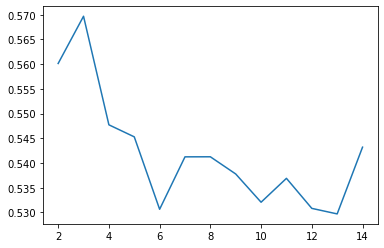

In [227]:
plt.plot(cluster_list,score)

In [228]:
kmeans.set_params(n_clusters = 5)

KMeans(max_iter=10000, n_clusters=5, random_state=1, verbose=3)

In [234]:
kmeans.fit(neigh_df)

Initialization complete
Iteration 0, inertia 87748084.36863858
Iteration 1, inertia 56550476.26619822
Iteration 2, inertia 54821745.96951186
Iteration 3, inertia 54342522.7244085
Iteration 4, inertia 53886311.93422762
Iteration 5, inertia 53606605.44950362
Iteration 6, inertia 53519947.837290056
Iteration 7, inertia 53477181.66606652
Iteration 8, inertia 53437405.06084867
Iteration 9, inertia 53399471.44402816
Iteration 10, inertia 53356591.39695162
Iteration 11, inertia 53317903.00472377
Iteration 12, inertia 53249712.569355845
Iteration 13, inertia 53203230.2713356
Iteration 14, inertia 53132612.812315084
Iteration 15, inertia 52925102.72078422
Iteration 16, inertia 52800610.13985624
Iteration 17, inertia 52751462.98291633
Iteration 18, inertia 52720227.577315874
Iteration 19, inertia 52679423.53914793
Iteration 20, inertia 52588231.03699798
Iteration 21, inertia 52552287.9573026
Iteration 22, inertia 52521079.73565398
Iteration 23, inertia 52462664.92912096
Iteration 24, inertia 523

Iteration 1, inertia 56474576.61748147
Iteration 2, inertia 54546438.49318161
Iteration 3, inertia 53658695.10986302
Iteration 4, inertia 52934111.622760974
Iteration 5, inertia 52502257.40846589
Iteration 6, inertia 52368763.73171402
Iteration 7, inertia 52291839.779844604
Iteration 8, inertia 52220400.98909154
Iteration 9, inertia 52168533.29784655
Iteration 10, inertia 52146528.853016935
Converged at iteration 10: center shift 7.131293863962597 within tolerance 7.962552336928401.


KMeans(max_iter=10000, n_clusters=5, random_state=1, verbose=3)

In [233]:
len(kmeans.labels_)

1752

In [235]:
fig = px.scatter_mapbox(neigh_df,
                        lat = "lat", 
                        lon = "long", 
                        color = kmeans.labels_
                       )



fig.show()